In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
refugee = pd.read_csv('../Data/final_df.csv')

In [3]:
refugee.head(2)

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,Children_out_of_school,Government,GDP($ in million),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi),Famine,Female,Male,Civil,Poverty
0,Afghanistan,AFG,Asia,6434.0,257553.0,3.4,122.81,Republic,19199.0,105090,327.0,101.0,25500100.0,249347.0,1.0,49.3,50.7,0.0,36.0
1,Albania,ALB,Europe,76.0,79.0,4.5,6.86,Constitutional monarchy,11456.0,57616,1485.0,254.0,2821977.0,11082.0,0.0,49.9,50.1,0.0,14.3


# Linear Regression

In [4]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Refugees_2015'].values


lm = LinearRegression()
model = lm.fit(X, y)
scores = cross_val_score(lm, X, y, cv=5)
print "R2", np.mean(scores)
print "Baseline", model.score(X, y)

R2 0.446957084643
Baseline 0.362960501853


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


# Logistic Regression

In [5]:
refugee.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

In [6]:
#Logisitic Regression looking into Civil War.
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Civil'].values

lm = LogisticRegression()
model = lm.fit(X, y)
scores = cross_val_score(lm, X, y, cv=5)
print "R2", np.mean(scores)
print "Baseline", model.score(X, y)

R2 0.959473684211
Baseline 0.989795918367


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


In [7]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover|Fam')
rem = refugee.filter(regex = 'Fam')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Famine'].values

lm = LogisticRegression()
model = lm.fit(X, y)
scores = cross_val_score(lm, X, y, cv=5)
print "R2", np.mean(scores)
print "Baseline", model.score(X, y)

R2 0.929373433584
Baseline 0.928571428571


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Refugees_2015'].values

dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3.fit(Xn, y)
dtr3_scores = cross_val_score(dtr3, Xn, y, cv=4)
print np.mean(dtr3_scores)

0.290365727998


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


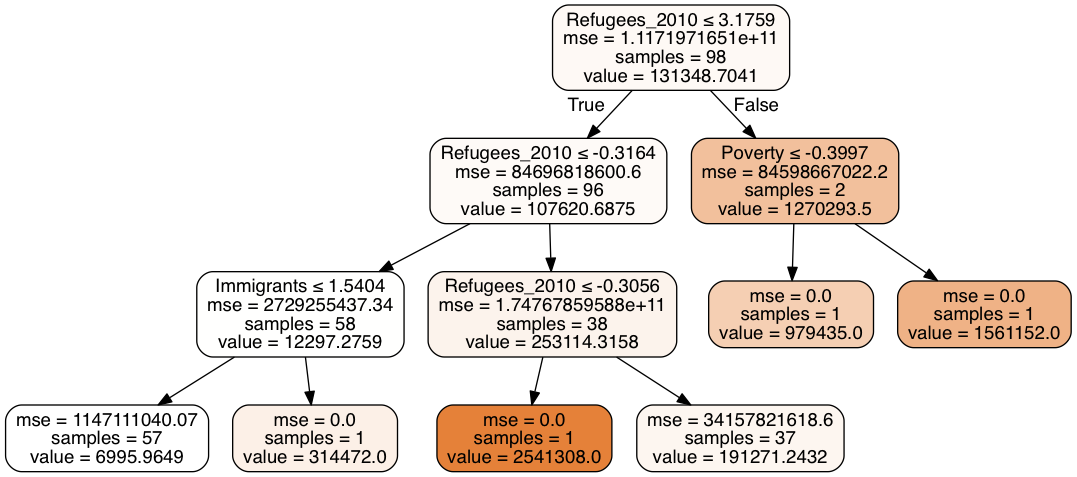

In [9]:
dot_data = StringIO()  

export_graphviz(dtr3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

# ROC Curve

In [10]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover|Fam')
rem = refugee.filter(regex = 'Fam')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Famine'].values

lm = LogisticRegression()
model = lm.fit(Xn, y)

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

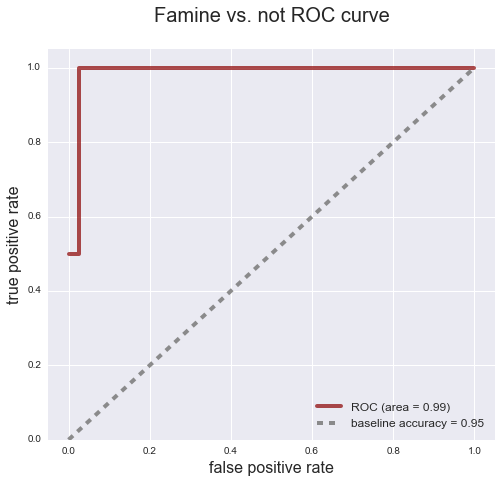

In [12]:
plot_roc(lm, X_test, y_test, 'Famine')

In [13]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee['Civil'].values

lm2 = LogisticRegression()
model = lm2.fit(Xn2, y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xn2, y2, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


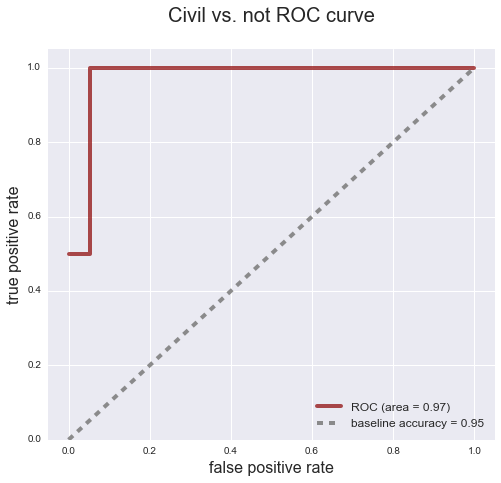

In [14]:
plot_roc(lm2, X_test2, y_test2, 'Civil')

# Precision Recall Curve

In [15]:
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)

In [16]:
def plot_prauc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(recall, precision, label='PRAUC (area = %0.2f)' % avg_precision,
             color='steelblue', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('recall', fontsize=16)
    axr.set_ylabel('precision', fontsize=16)
    axr.set_title(varname+' vs. not PRAUC curve\n', fontsize=20)

    axr.legend(loc="upper right", fontsize=12)

    plt.show()


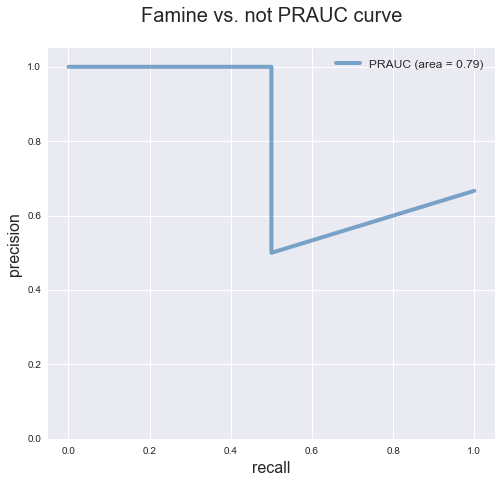

In [17]:
plot_prauc(lm, X_test, y_test, 'Famine')

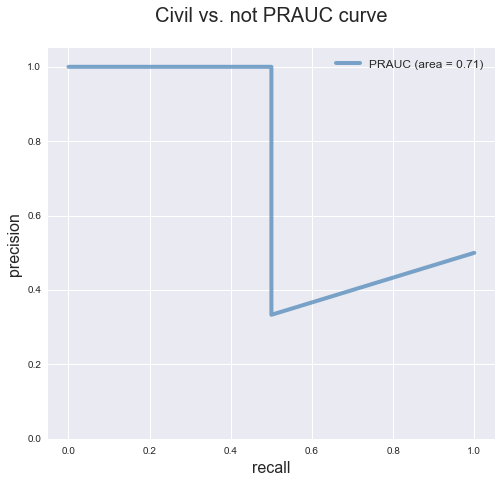

In [18]:
plot_prauc(lm2, X_test2, y_test2, 'Civil')

# PCA

In [19]:
refugee.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

In [20]:
value = refugee.filter(regex = 'Ref|Mur|Child|GD|Fam|Civi|Pov')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Refugees_2015'].values

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(X.values)

PCA(copy=True, n_components=7, whiten=False)

In [22]:
pcs = pca.transform(X)
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pcs[:,0:10], y, cv=4)
print np.mean(pca_scores)

0.460683176655


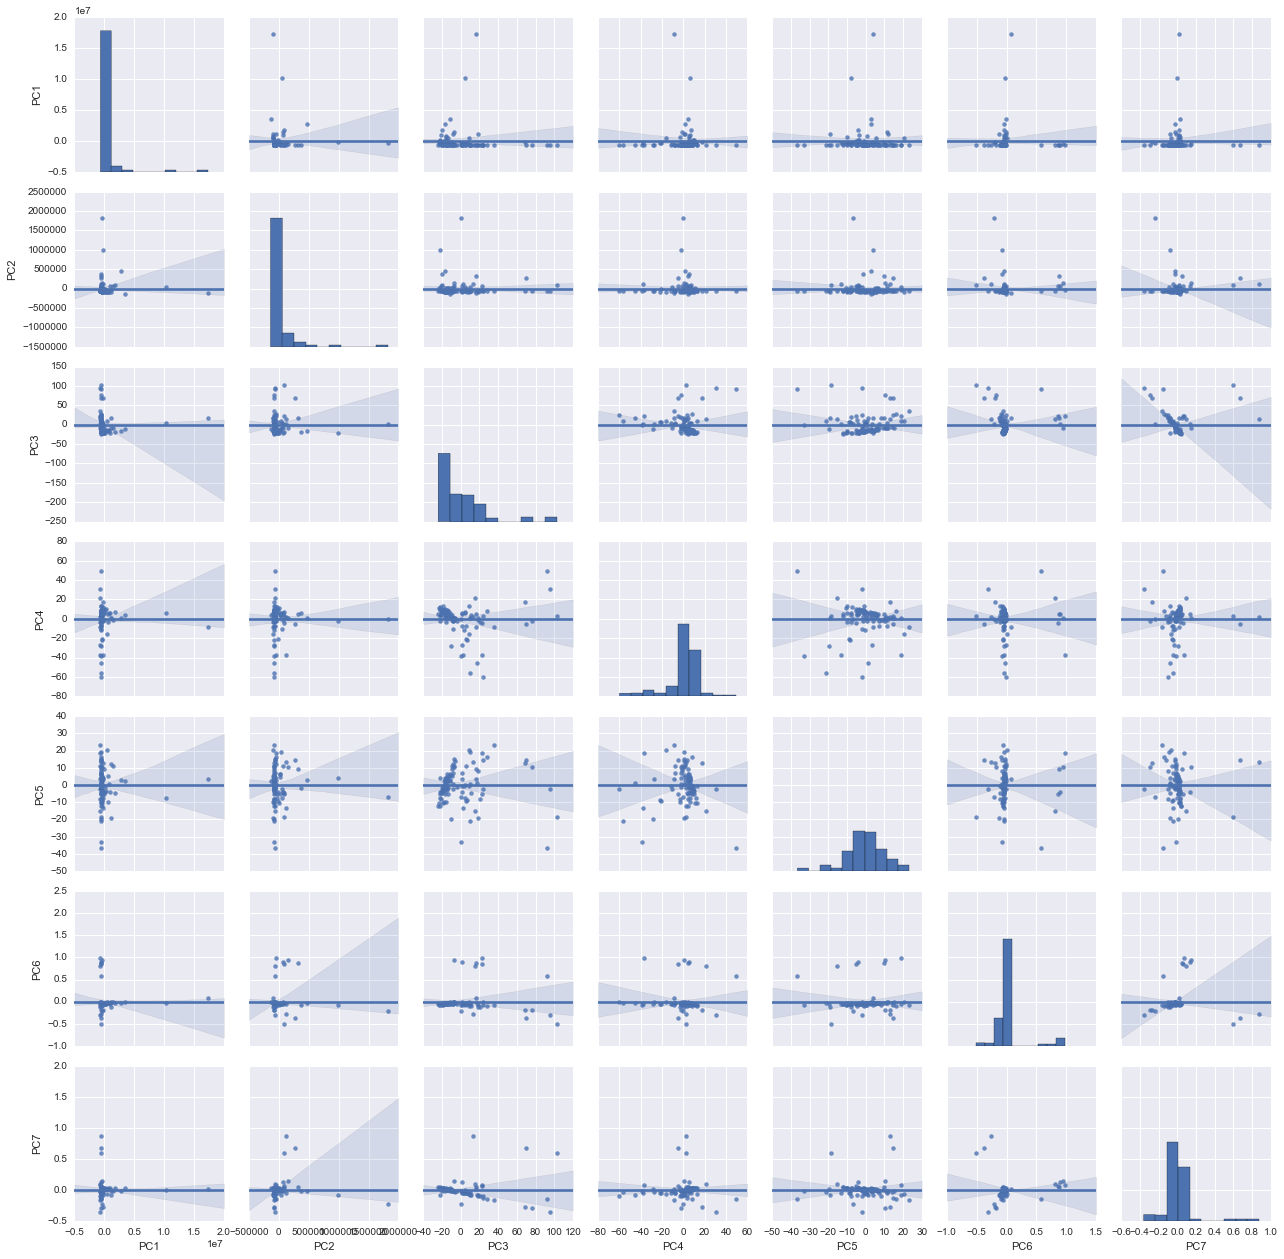

In [23]:
sns.pairplot(pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6', 'PC7']), kind='reg')

# Neural Network

In [24]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [25]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Civil'].values

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [26]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(y_train)
test_y_ohe = one_hot_encode_object_array(y_test)

In [27]:
model = Sequential()
model.add(Dense(16, input_shape=(6,)))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(X_train, train_y_ohe, nb_epoch=100, verbose=1);

Epoch 1/100
58/58 [==============================] - 0s - loss: 1.0910 - acc: 0.0172         
Epoch 2/100
58/58 [==============================] - 0s - loss: 1.0667 - acc: 0.0172         
Epoch 3/100
58/58 [==============================] - 0s - loss: 1.0412 - acc: 0.0172         
Epoch 4/100
58/58 [==============================] - 0s - loss: 1.0158 - acc: 0.0172     
Epoch 5/100
58/58 [==============================] - 0s - loss: 0.9910 - acc: 0.0172     
Epoch 6/100
58/58 [==============================] - 0s - loss: 0.9667 - acc: 0.0172     
Epoch 7/100
58/58 [==============================] - 0s - loss: 0.9430 - acc: 0.0172     
Epoch 8/100
58/58 [==============================] - 0s - loss: 0.9200 - acc: 0.0345         
Epoch 9/100
58/58 [==============================] - 0s - loss: 0.8969 - acc: 0.0345     
Epoch 10/100
58/58 [==============================] - 0s - loss: 0.8744 - acc: 0.0517     
Epoch 11/100
58/58 [==============================] - 0s - loss: 0.8522 - acc: 0.06

In [28]:
loss, accuracy = model.evaluate(X_test, test_y_ohe, verbose=0)
print accuracy

0.95
